## (1) Data Description
I focus on the players.csv file for this project.  
Number of observations: 196  
Number of variables: 7  

#### Variables:
- experience (character): Player experience level
- subscribe (logical): Whether the player subscribed to the newsletter
- hashedEmail (character): Player ID  
- played_hours (double): Total played hours
- name (character): Player name 
- gender (character): Player gender
- Age (double): Player age

#### Summary statistics:
Mean played_hours: 5.85 hours  
Mean Age: 21.14 years

#### Issues:
1. Because players joined the research server voluntarily, the sample is not representative of all Minecraft players, so the results cannot be generalized to a broader population.
2. There are some sessions are very long,probably caused by the player was AFK, which may make the variable inaccurate.
3. There is missing or blank information,which may affect model training.


## (2)Questions:
Broad question:Question 2  
Specific question: Can a player’s age predict their total played hours?

Here the response variable is played_hours, and the explanatory variable is Age. I can address this question using only players.csv, because the file already contains both variables and each row combines the player’s age and their total play time, so we don't have to combine sessions.csv.

Planned data wrangling:  
Using select to keep only the "played_hours" and "Age" columns that are relevant to the analysis.

## (3)Exploratory data analysis and visualization

In [34]:
library(tidyverse)

players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [35]:
players |>select (played_hours,Age)

played_hours,Age
<dbl>,<dbl>
30.3,9
3.8,17
0.0,17
0.7,21
0.1,21
0.0,17
0.0,19
0.0,21
0.1,47


In [36]:
players|>summarize(mean_played_hours = round(mean(played_hours),2),
                   mean_age = round(mean(Age,na.rm = TRUE),2))

mean_played_hours,mean_age
<dbl>,<dbl>
5.85,21.14


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


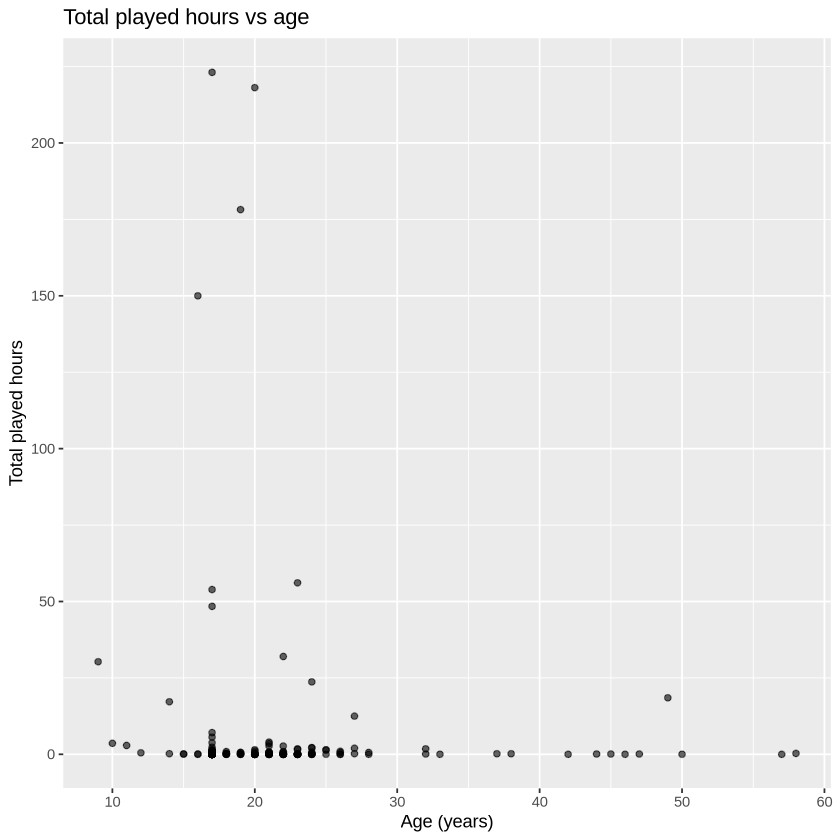

In [37]:
ggplot(players, aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.6) +
  labs(
    title = "Total played hours vs age",
    x = "Age (years)",
    y = "Total played hours"
  )

From the plot we can see that the relationship between age and total played hours is weak overall,but the few heavy players tend to be younger.This suggests that age may still have some predictive value, especially for identifying high engagement players.Since the relationship appears non-linear, linear regression would not be appropriate.

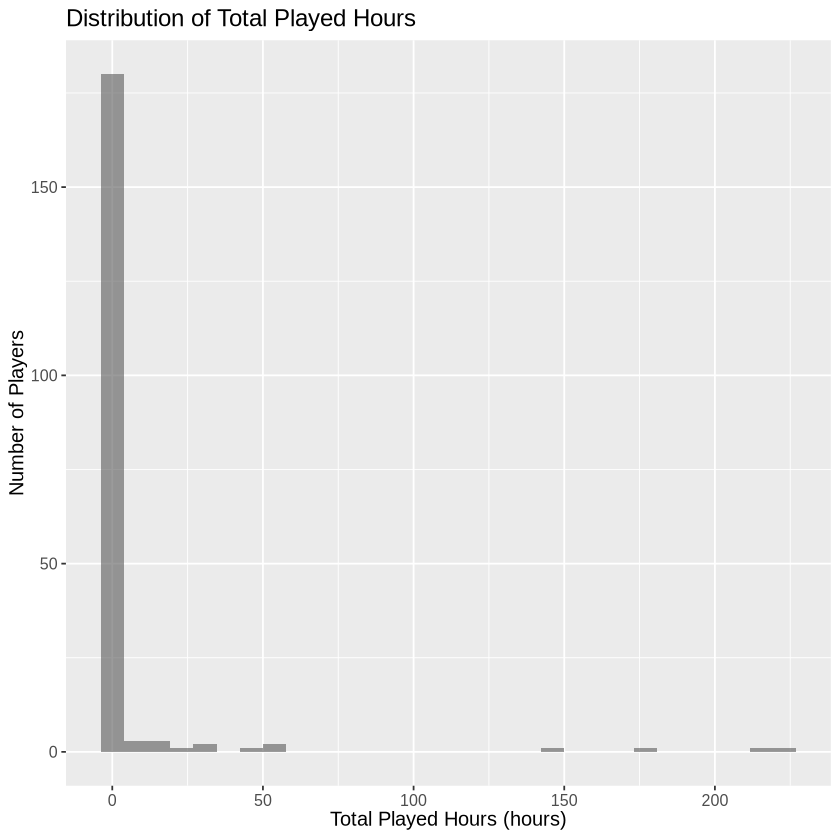

In [38]:
ggplot(players, aes(x = played_hours)) +
  geom_histogram(bins = 30,alpha = 0.6) +
  labs(
    title = "Distribution of Total Played Hours",
    x = "Total Played Hours (hours)",
    y = "Number of Players"
  ) +
  theme(text = element_text(size = 12))

This histogram helps us understand the distribution of the response variable (played_hours). The plot indicates that most players have low playtime while a few play extremely long hours. It may affect the stability of prediction models.

## (4) Methods and Plan
To address the question “Can a player’s age predict their total played hours?”, I will use K-nearest neighbors regression with played_hours as the response variable and Age as the predictor.

The scatter plot shows that the relationship between age and total playtime is weak and potentially non-linear. Most players have low playtime, while a few very heavy players tend to be younger. Because K-NN makes minimal assumptions and can flexibly capture non-linear patterns, it is a suitable method in this setting.

K-NN assumes that players with similar ages have similar playtime. However, the method is sensitive to outliers, which matters here because played_hours is highly right skewed and may include AFK sessions. Using only one predictor also limits the model’s predictive ability.

I will use initial_split to divide the data into a 75% training set and a 25% test set, stratified by played_hours so that the skewed distribution is preserved. On the training set, I will create a simple tidymodels recipe and include centering and scaling. Then I will run 5 fold cross validation over a grid of K values to find the number of neighbours that gives the lowest cross-validated RMSE. Once the best K is chosen, I will fit the final K-NN model on the full training set and evaluate it on the test set using RMSPE.